In [1]:
import toytree
import toyplot
import numpy as np

In [2]:
fish = toytree.mtree("https://eaton-lab.org/data/Xiphophorus-160mb-consenstrees.tre")

In [3]:
customorder = [
    "Priapella",
    "Psjonesii",
    "Xmayae",
    "Xalvarezi",
    "Xhellerii",
    "Xsignum",
    "Xmonticolus",
    "Xclemenciae_G",
    "Xbirchmanni_GARC",
    "Xmalinche_CHIC2",
    "Xcortezi",
    "Xnezahuacoyotl",
    "Xmontezumae",   
    "Xcontinens",
    "Xpygmaeus",
    "Xmultilineatus",    
    "Xnigrensis",
    "Xgordoni",
    "Xmeyeri",
    "Xcouchianus",
    "Xxiphidium",
    "Xvariatus",
    "Xevelynae",
    "Xmilleri",
    "Xandersi",
    "Xmaculatus_JpWild",
]

In [4]:
t = toytree.TreeStyle.TreeStyle('m')
tt = toytree.TreeStyle.TreeStyle('s')
s = toytree.TreeStyle.Style()
#t.edge_style = {"a": "what"}


In [5]:
tt.edge_style = {"opacity": 0.5}
t.edge_style

{'opacity': 0.1}

In [20]:
t._edge_style.update({"a": "what"})
t.edge_style

{'stroke': '#262626',
 'stroke-width': 2,
 'stroke-linecap': 'round',
 'opacity': 1,
 'a': 'what'}

(<toyplot.canvas.Canvas at 0x7f63c3860fd0>,
 <toyplot.coordinates.Cartesian at 0x7f63cf171358>)

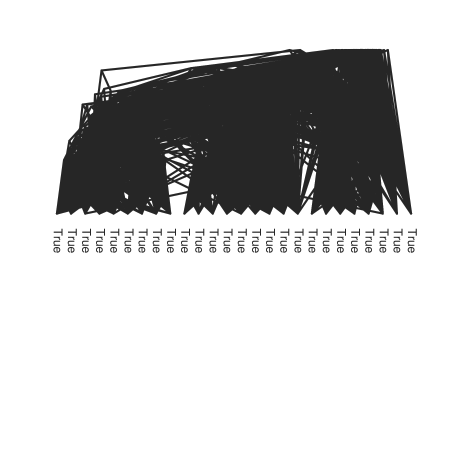

In [5]:
fish.draw_cloud_tree();

In [9]:
# a linear color map 
colormap = toyplot.color.brewer.map("BlueGreen", reverse=True)
colormap

In [11]:
# calculate RF distances for each tree compared to the consensus
fishcons = fish.get_consensus_tree()
rfdists = np.array([
    fishcons.tree.robinson_foulds(i.tree, unrooted_trees=True)[0] 
    for i in fish.treelist
])

# map values to colors
colors = toyplot.color.broadcast((rfdists, colormap), shape=rfdists.shape)

# print first 10 values and color
print(rfdists[:10])
colors[:10]

[10 16 20 14 25 13 18  9 21 20]


array([(0.85228758, 0.94248366, 0.83006536, 1.),
       (0.66823529, 0.8703268 , 0.71398693, 1.),
       (0.48235294, 0.8       , 0.76862745, 1.),
       (0.74352941, 0.89960784, 0.74745098, 1.),
       (0.26013072, 0.65098039, 0.8       , 1.),
       (0.78117647, 0.91424837, 0.76418301, 1.),
       (0.57647059, 0.83555556, 0.7372549 , 1.),
       (0.87320261, 0.95084967, 0.8530719 , 1.),
       (0.43529412, 0.77385621, 0.78431373, 1.),
       (0.48235294, 0.8       , 0.76862745, 1.)],
      dtype=[('r', '<f8'), ('g', '<f8'), ('b', '<f8'), ('a', '<f8')])

In [17]:
self = toytree.Multitree.CloudTree(fish)

In [18]:
kwargs = {"edge_style": edicts}
if isinstance(kwargs.get('edge_style'), list):
    if not len(kwargs['edge_style']) == len(self.mtree):
        raise IndexError('stylelist length must match treelist length')
    for idx, tre in enumerate(self.mtree.treelist):
        tre._style.edge_style = kwargs['edge_style'][idx]


In [22]:
#self.mtree.treelist[0]._style

AttributeError: 'list' object has no attribute 'cssdict'

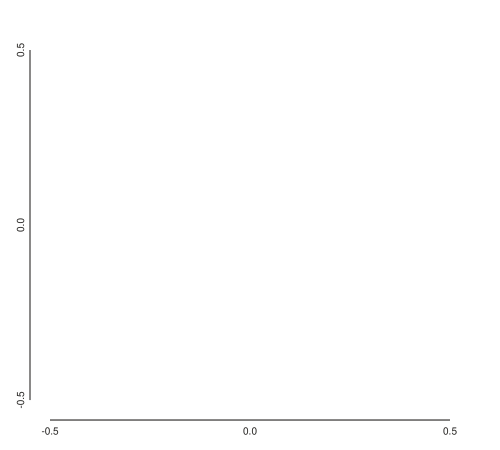

In [23]:
# edge_style as a list of style dictionaries
edicts = [toytree.TreeStyle.EdgeStyle(){"stroke": col, "opacity": 0.05} for col in colors]

# draw cloud tree
draw = fish.draw_cloud_tree(
    fixed_order=customorder,
    height=450, 
    width=500,
    orient='right',
    edge_style=edicts,
    tip_labels=["<i>{}. {}</i>".format(i[0], i[1:]) for i in customorder],
);